In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8')
df

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
column_name = ['Id', 'Name', 'Age', 'Weight', 'm0006', 'm0612', 'm1218', 'f0006', 'f0612', 'f1218']

In [4]:
df = pd.read_csv('patient_heart_rate.csv',header=0,delimiter=',',encoding='utf-8', names=column_name)
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name', axis=1)

In [6]:
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        y = int(float_x / 2.2)
        #y = str(y)
        weight[i] = y
    if 'kgs' in x[-3:]:
        x = x[:-3]
        float_x = float(x)
        weight[i] = x

C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\4154490206.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\4154490206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\4154490206.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\Admin\AppData\Local\Temp\ipykernel_2496\415449020

In [7]:
df.rename(columns={'Weight':'Weight_kgs'}, inplace=True)

In [8]:
df.dropna(how='all', inplace=True)

In [9]:
df = df.drop_duplicates (subset=['Firstname', 'Lastname', 'Age', 'Weight_kgs'])

In [10]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

In [11]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [12]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

In [13]:
df.head(10)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Micky,Mous
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther
5,6.0,52.0,85,-,-,-,68,75,72,Huey,McDuck
6,7.0,19.0,56,-,-,-,71,78,75,Dewey,McDuck
7,8.0,32.0,78,78,76,75,-,-,-,Scpy,Doo
11,10.0,12.0,45,-,-,-,92,95,87,Louie,McDuck
12,11.0,34.0,60,78,75,72,-,-,-,Henry,Nam


In [14]:
df = pd.melt (df, id_vars=['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'], value_name='PulseRate', var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs', 'Firstname', 'Lastname'])
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-


In [15]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)
df_temp

,0,1,2
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [16]:
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']
df_temp

,Gender,Lower_hour,Upper_hour
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [17]:
df = pd.concat([df,df_temp], axis=1)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12


In [18]:
df = df.drop(['gender_time'],axis=1)
df.head(5)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12


In [19]:
df = df.replace('-',np.nan).dropna (subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [20]:
df['Firstname'].isnull().sum()

3

In [21]:
df['Lastname'].isnull().sum()

3

In [22]:
df['Firstname'].fillna('Unknown', inplace=True)

In [23]:
df['Lastname'].fillna('Unknown', inplace=True)

In [24]:
df = df.reset_index()
df.head(5)

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12


In [25]:
df.to_csv('patient_heart_rate_clean.csv')

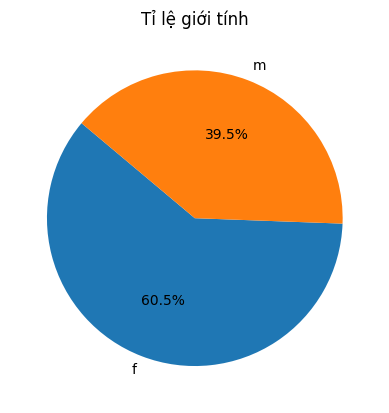

In [26]:
#1. Vẽ biểu đồ Pie thể hiện tỉ lệ bệnh nhân nam và nữ
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỉ lệ giới tính')
plt.show()

           Fullname
0        Micky Mous
1        Micky Mous
2        Micky Mous
3       Donald Duck
4       Donald Duck
5       Donald Duck
6        Mini Mouse
7        Mini Mouse
8        Mini Mouse
9    Scrooge McDuck
10   Scrooge McDuck
11   Scrooge McDuck
12     Pink Panther
13     Pink Panther
14      Huey McDuck
15      Huey McDuck
16      Huey McDuck
17     Dewey McDuck
18     Dewey McDuck
19     Dewey McDuck
20         Scpy Doo
21         Scpy Doo
22         Scpy Doo
23     Louie McDuck
24     Louie McDuck
25     Louie McDuck
26        Henry Nam
27        Henry Nam
28        Henry Nam
29      Michel Long
30      Michel Long
31      Michel Long
32       Tana Ricky
33       Tana Ricky
34       Tana Ricky
35  Unknown Unknown
36  Unknown Unknown
37  Unknown Unknown


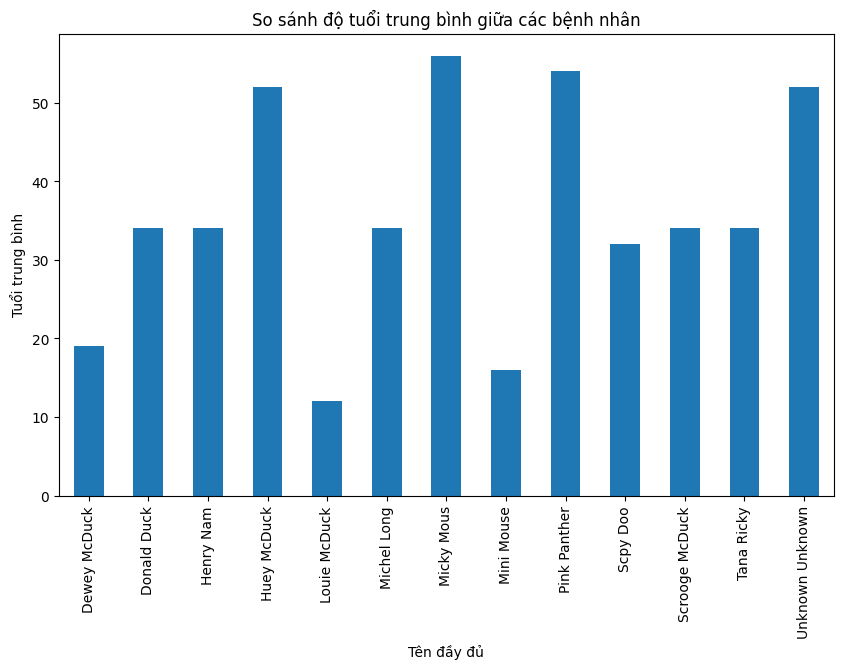

In [27]:
#2. Tạo cột Fullname = Firstname + Lastname
df['Fullname'] = df['Firstname'] + ' ' + df['Lastname']
print(df[['Fullname']])

#3. Vẽ biểu đồ cột so sánh độ tuổi giữa bệnh các tên bệnh nhân
# Nhóm dữ liệu theo 'Fullname' và tính độ tuổi trung bình cho mỗi nhóm
grouped_df = df.groupby('Fullname')['Age'].mean().reset_index()

# Vẽ biểu đồ cột sau khi nhóm dữ liệu
grouped_df.plot(kind='bar', x='Fullname', y='Age', legend=False, figsize=(10, 6))
plt.title('So sánh độ tuổi trung bình giữa các bệnh nhân')
plt.xlabel('Tên đầy đủ')
plt.ylabel('Tuổi trung bình')
plt.show()


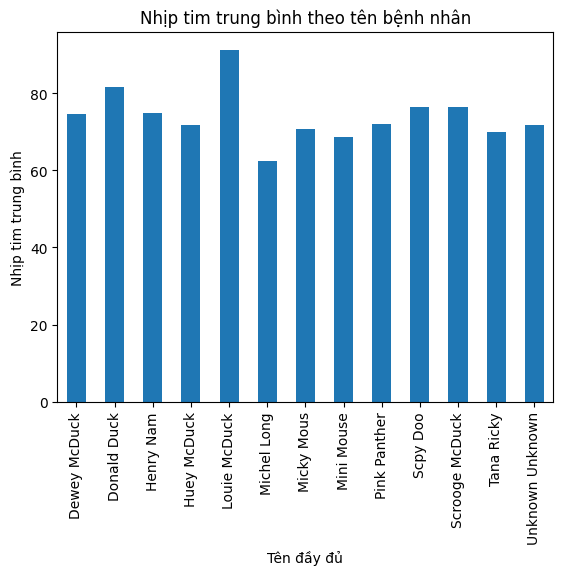

In [28]:
# Nếu cột PulseRate là dạng object, chuyển đổi nó sang kiểu số
df['PulseRate'] = pd.to_numeric(df['PulseRate'], errors='coerce')

#4. Vẽ biểu đồ cột của nhịp tim trung bình theo tên bệnh nhân
df.groupby('Fullname')['PulseRate'].mean().plot(kind='bar')
plt.title('Nhịp tim trung bình theo tên bệnh nhân')
plt.xlabel('Tên đầy đủ')
plt.ylabel('Nhịp tim trung bình')
plt.show()


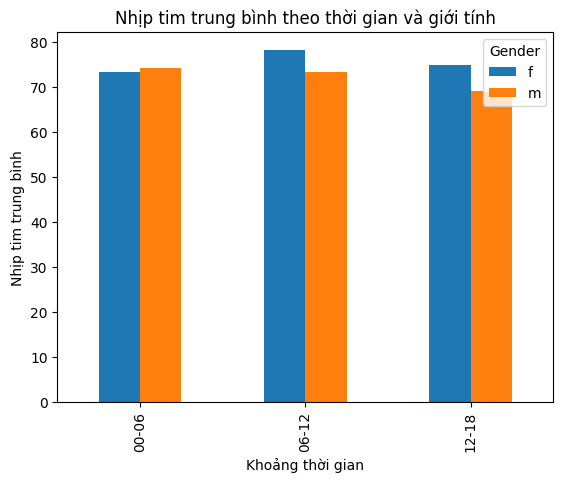

In [29]:
# Tạo cột Time_Slot để phân nhóm theo thời gian
df['Time_Slot'] = df['Lower_hour'].astype(str) + '-' + df['Upper_hour'].astype(str)

#5. Biểu đồ cột của nhịp tim trung bình theo thời gian và giới tính
df.groupby(['Time_Slot', 'Gender'])['PulseRate'].mean().unstack().plot(kind='bar')
plt.title('Nhịp tim trung bình theo thời gian và giới tính')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Nhịp tim trung bình')
plt.show()

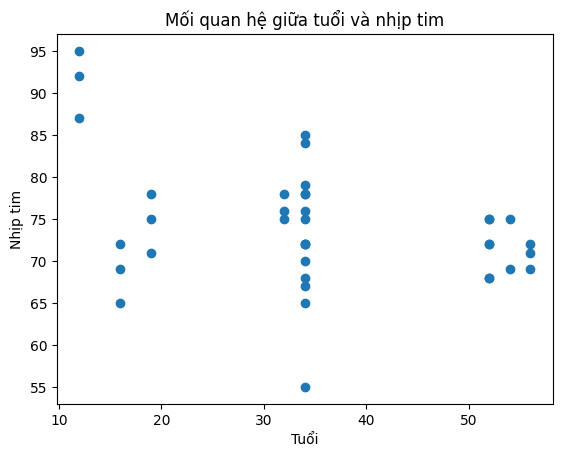

In [30]:
#6. Biểu đồ phân tán của tuổi và nhịp tim
plt.scatter(df['Age'], df['PulseRate'])
plt.title('Mối quan hệ giữa tuổi và nhịp tim')
plt.xlabel('Tuổi')
plt.ylabel('Nhịp tim')
plt.show()

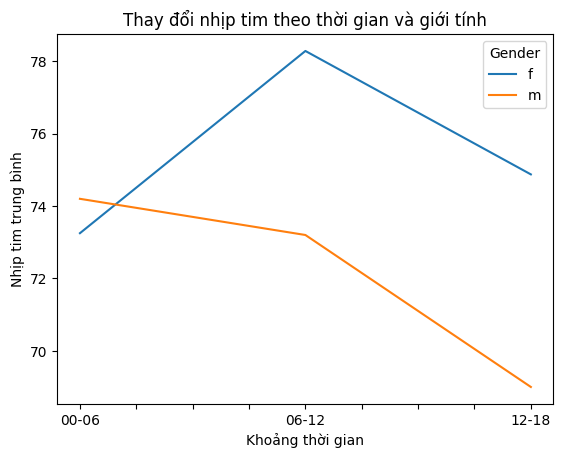

In [31]:
#7 Biểu đồ đường thể hiện thay đổi nhịp tim theo thời gian và giới tính
df.groupby(['Time_Slot', 'Gender'])['PulseRate'].mean().unstack().plot(kind='line')
plt.title('Thay đổi nhịp tim theo thời gian và giới tính')
plt.xlabel('Khoảng thời gian')
plt.ylabel('Nhịp tim trung bình')
plt.show()